### `1` What is Tensorflow ? And how is Keras different from it?


Tensorflow is an opensource and a symbolic math library framework that is devloped by google and its version 1.0 was released in 2015. This library is used for Machine learning and Artifical intelligence model building and training.

Features

AutoDifferentiation

AutoDifferentiation is the process of automatically calculating the gradient vector of a model with respect to each of its parameters. 

Eager execution

TensorFlow includes an “eager execution” mode, which means that operations are evaluated immediately as opposed to being added to a computational graph which is executed later.

Losses

To train and assess models, TensorFlow provides a set of loss functions. These loss functions compute the “error” or “difference” between a model's output and the expected output .

Metrics

In order to assess the performance of machine learning models, TensorFlow gives API access to commonly used metrics. Examples include various accuracy metrics (binary, categorical, sparse categorical) along with other metrics such as Precision, Recall.


Optimizers

TensorFlow offers a set of optimizers for training neural networks, including ADAM, ADAGRAD, and Stochastic Gradient Descent (SGD).


##### Keras

Keras is an effective high-level neural network Application Programming Interface (API) written in Python. This open-source neural network library is designed to provide fast experimentation with deep neural networks, and it can run on top of TensorFlow. 

TensorFlow	
1.	Tensorhigh-performanceFlow is written in  C++, CUDA, Python.	
2.	TensorFlow is used for large datasets and high performance models.
3.	TensorFlow is a framework that offers both high and low-level APIs
4.	TensorFlow is used for high-performance models.
5.	In TensorFlow performing debugging leads to complexities.
6.	TensorFlow has a complex architecture and not easy to use.


Keras is written in Python.
1. Keras is usually used for small datasets.
2. Keras is a high-Level API.
3. Keras is used for low-performance models.
4. In Keras framework, there is only minimal requirement for debugging the simple networks.
5. Keras has a simple architecture and easy to use.




### `2` What are different types of models in Keras?  Explain the working of Sequential modeling. 

There are two different types of models in keras as follows:

1. Sequential
2. Functional API

#### Sequential Model

Sequential model can be called from tensorflow.keras.model library as below

from tensorflow.keras.model import Sequential

model = Sequential()

Once the model is called different layers can be added to the model using the add function. The model is defined in a stack manner.

from tensorflow.keras.layers import Input,Dense

model.add(Input(10))

model.add(Dense(5))

model.add(Dense(1))

We have created a neural network with three layers Input, Hidden and Output. The Input layer has 10 nodes, the hidden layer has 5 nodes and the output layers has 1 node.
We can add different activations into the hidden layer and output just by stating the name of the functions in a string or by calling the function from keras api.

model.add(Dense(5,activation = tensorfliow.keras.activations.relu())) #This way we have added a activation of relu into our hidden layer

The model is executed sqeuntially from top to bottom

Before going into training we have to compile the model using the compie() function and then the model can be fitted using the fit() function.While compiling the model optimizer can be chosen using the keras api or passing a string value with the name of optimizer to the compile function. We can also use validation data to see how the model performs on the data that is not being used to train the model while model is training.




### `3` Explain the losses in Deep Learning and how are they responsible for model learning?

Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. The goal of training a model is to find a set of weights and biases that have low loss, on average, across all examples. This loss can be used by the model to calculate the new weights that can reduce the error/loss.

The loss is used in the back propagation, the weights and biases are differentiated against the loss to get a new set of weights for all the nodes in the model.There re different type of loss functions for different type of problems.

Regression Problem:

Mean Squared error
Root Mean squared error

Classification Problem

Cross-Entropy (logarithmic loss)


### `4` MNIST has been the toy dataset for Deep Learning, but today you will need to design a Neural Network for the Fashion MNIST dataset (can be sourced from keras.datasets.fashion_mnist). 
1. How many hidden layers are required for this dataset? 
2. How many neurons per layer work best for the model, explain and generate insights across it.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as dt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [2]:
(x_train, y_train), (x_test, y_test) = dt.fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
clasess = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
print(clasess)

X_train = x_train.reshape((60000,28*28))
X_test = x_test.reshape((10000,28*28))
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [18]:
model = Sequential()

model.add(Input(shape=(784)))
model.add(Dense(300,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(120,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer=Adam(),metrics='accuracy',loss = "categorical_crossentropy")

model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=200,batch_size=500)

hist = model.history.history

Epoch 1/200
  5/120 [>.............................] - ETA: 1s - loss: 135.9591 - accuracy: 0.2308 

2022-12-03 00:14:09.827664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 2s 11ms/step - loss: 12.1700 - accuracy: 0.5777 - val_loss: 1.0938 - val_accuracy: 0.7156
Epoch 2/200
  1/120 [..............................] - ETA: 1s - loss: 1.6839 - accuracy: 0.6480

2022-12-03 00:14:11.102143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 1s 9ms/step - loss: 1.4892 - accuracy: 0.6340 - val_loss: 0.9183 - val_accuracy: 0.7241
Epoch 3/200
120/120 [==============================] - 1s 9ms/step - loss: 1.1868 - accuracy: 0.6655 - val_loss: 0.8457 - val_accuracy: 0.7354
Epoch 4/200
120/120 [==============================] - 1s 9ms/step - loss: 0.9917 - accuracy: 0.6958 - val_loss: 0.7515 - val_accuracy: 0.7572
Epoch 5/200
120/120 [==============================] - 1s 9ms/step - loss: 0.9011 - accuracy: 0.7111 - val_loss: 0.6823 - val_accuracy: 0.7725
Epoch 6/200
120/120 [==============================] - 1s 9ms/step - loss: 0.8105 - accuracy: 0.7286 - val_loss: 0.6250 - val_accuracy: 0.7904
Epoch 7/200
120/120 [==============================] - 1s 9ms/step - loss: 0.7551 - accuracy: 0.7373 - val_loss: 0.6051 - val_accuracy: 0.7935
Epoch 8/200
120/120 [==============================] - 1s 9ms/step - loss: 0.7089 - accuracy: 0.7476 - val_loss: 0.5466 - val_accuracy: 0.8131
Epoch 9/200

Text(0.5, 1.0, 'Accuracy')

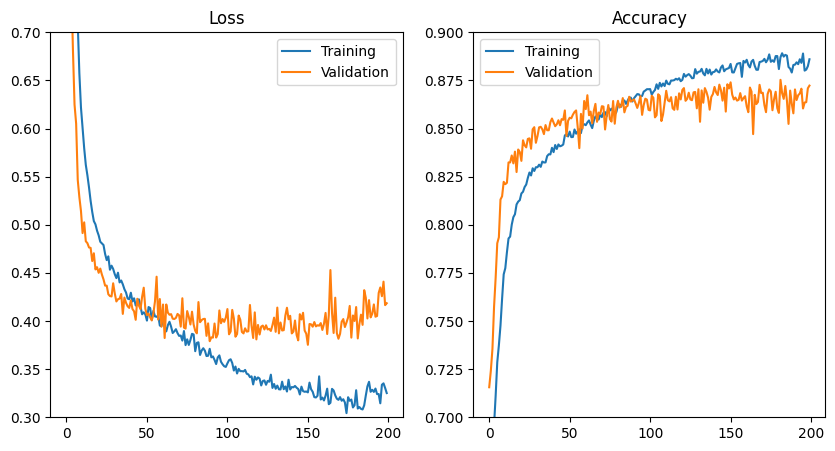

In [25]:
fig = plt.subplots(1,2,figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(hist["loss"])
plt.plot(hist['val_loss'])
plt.legend(['Training','Validation'])
plt.ylim(0.3,0.7)
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(hist["accuracy"])
plt.plot(hist['val_accuracy'])
plt.legend(['Training','Validation'])
plt.ylim(0.7,0.9)
plt.title('Accuracy')

2022-12-02 23:55:12.705796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


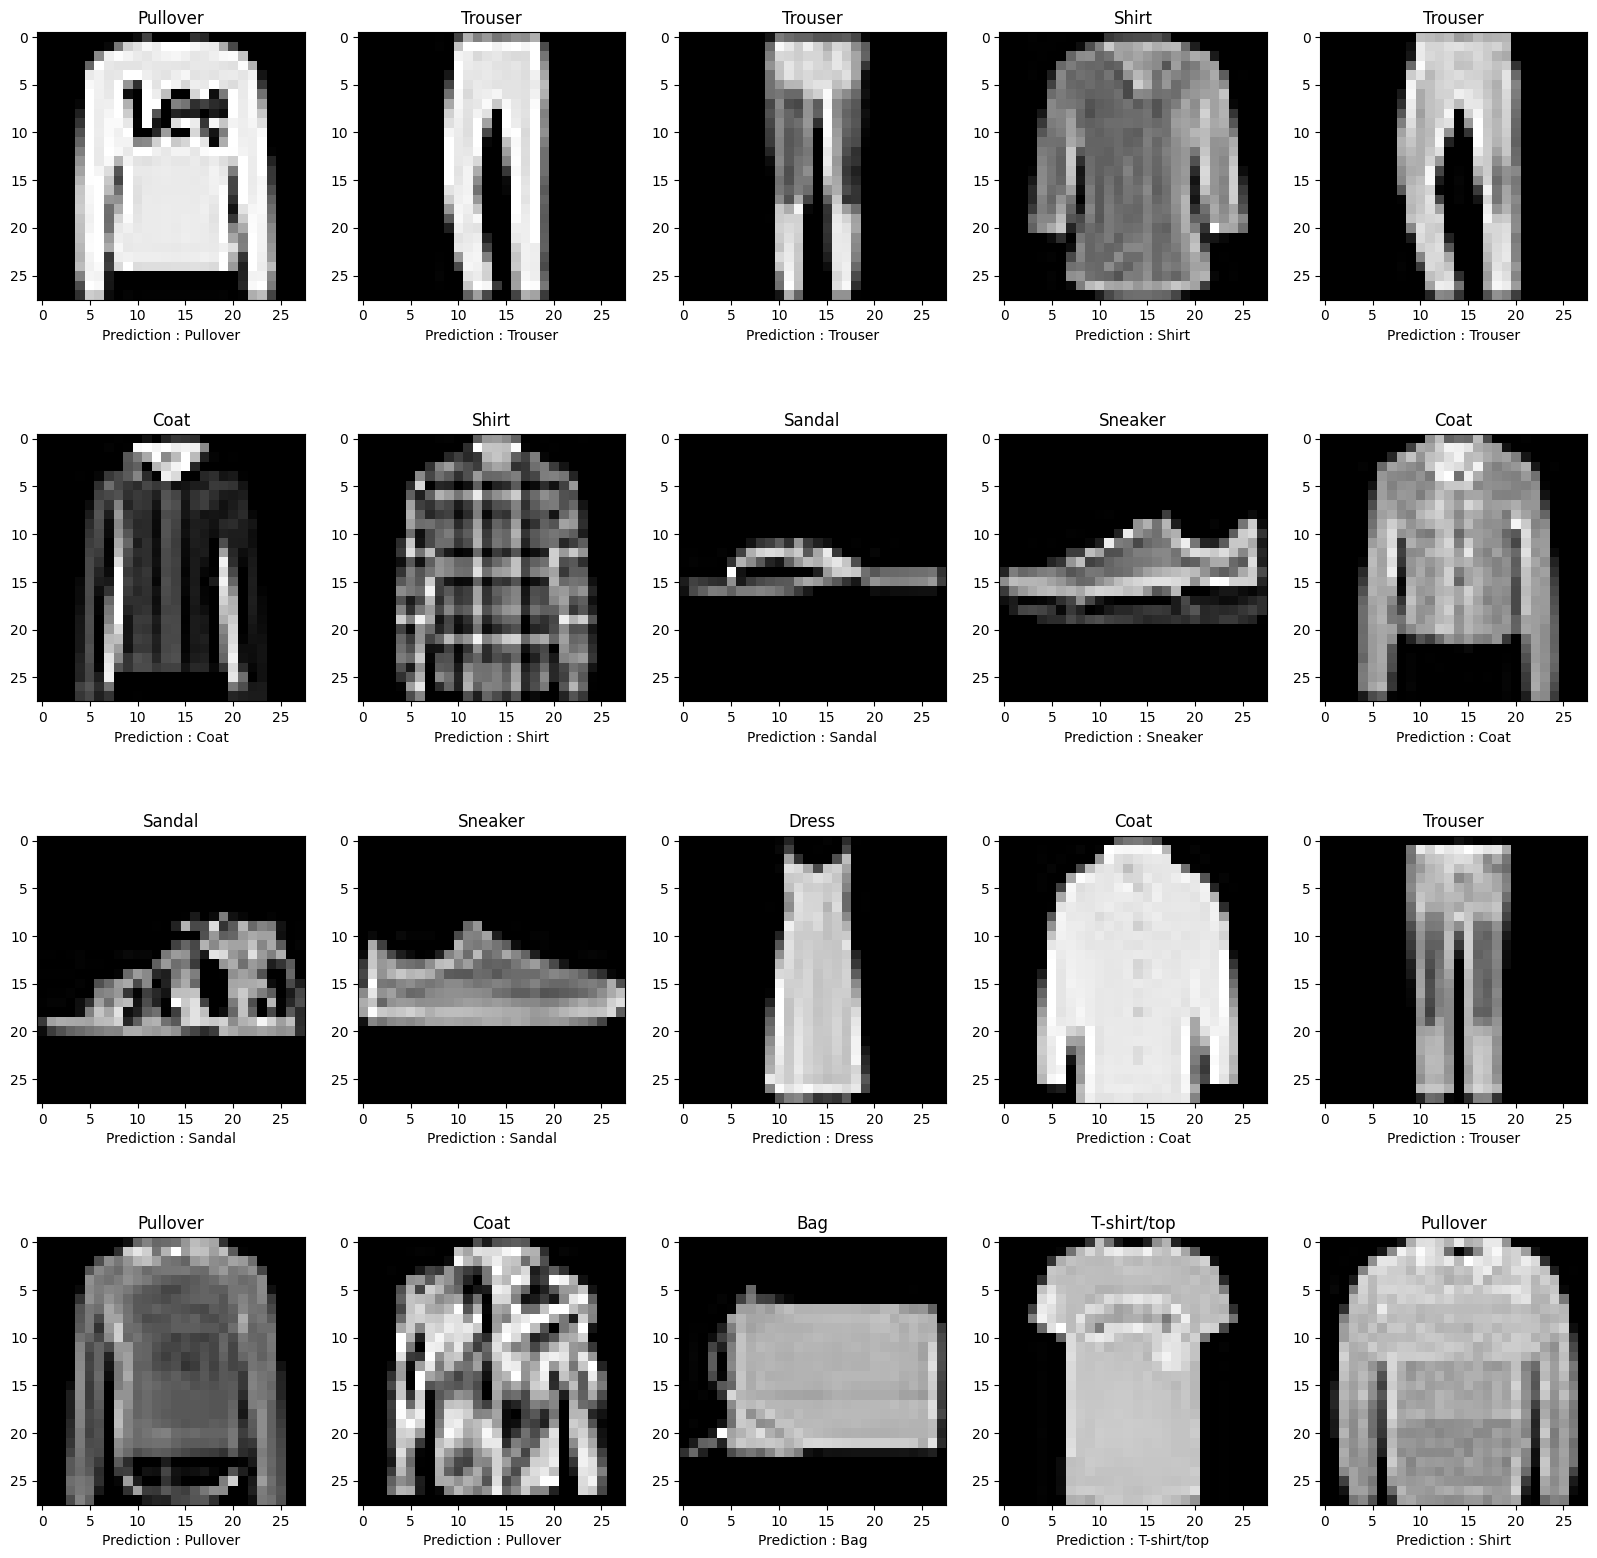

In [12]:
fig = plt.subplots(4,5,figsize = (20,20))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.imshow(x_test[i],cmap='gray')
    plt.title(clasess[y_test[i]])
    plt.xlabel("Prediction : " + clasess[np.argmax(model.predict(X_test[i].reshape(-1,784),verbose=0))])


#clasess[np.argmax(model.predict(X.reshape(-1,784)))]

* A single hidden layer can get accuracy of 91%-92% on training data and 86%-87% on validation dataset with slight overfitting

* Every hidden layer with no. of neurons with half of the neurons of previously works great for this dataset

* The model with hidden layer (392 neurons),hidden layer (196 neurons),hidden_layer (98 neurons), hidden layer (46 neurons) hidden layer (23 neurons) neurons gets the highest training accuracy with 88% validation accuracy.

* The best suited learning rate is 0.001 which is the default for Adam optimizer

### `5` Explain your understanding of overfitting and underfitting in detail. How do you identify and measure overfitting?

`Overfitting`

The model is said to be in a overfitting state if the model learns on the training set very well but when unknown data is passed through the model it performs poorly, for example if the model's accuracy on the training data is 100% and when trying to predict on test data the model predicts with just 90% accuracy.

`Under-fitting`
The model is under-fitted when it is unable to capture the relation between dependent and independent variable while training the model and this leads for the model to perform poorly on the training dataset

We can measure overfitting or under fitting using the metrics such as accuracy and loss The below graph is for an overfitted model where it can be observed that accuracy of the model on training dataset is nearly 92.5% whereas for the validation set is around 86 - 87% and the loss for the training data as reduced way much more than that of the validation dataset


<img src = './overfitting.png'/>

Overfitting in NN can be reduced by using various methods,

* Dropout layer

    * A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. This is called dropout  to reduce overfitting and improve generalisation error in deep neural networks of all kinds.


* Regularisation layer

    * Regularisation refers to a technique which can be used to reduce the complexity of the Neural Network which in return decreases the overfitting of the model.


### `6` What is the use of batch size and why is it used in Deep Learning?


Deep Neural networks uses Gradient Descent method to minimise the loss and update the weights of the model to generate a appropriate linear equation for the dataset. Where it uses the whole dataset at once to do all the calculations. The amount of datapoints used to calculate the gradient is called batch. A very large batch may cause even a single iteration to take a very long time to compute.

`Stochastic Gradient Descent`

In this method the gradient decent is calculated using a single datapoint/row at a time. SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.

`Mini-batch stochastic gradient descent`

This method is a middle ground between the two different approach of achieving the minima, In this method a batch_size is defined for the model to calculate the gradient using a variable of datapoints defined by user , while fitting the model the batch_size can be defined , This method reduces the noise than the SGD and is also more efficient than the full-batch approach.


The default value for batch_size is 32 i sequential model fit function.



### `7` Using the above problem statement of Fashion MNIST build a NN with different batch sizes and report the accuracy metrics (acc, val acc, loss, val loss) in a sheet?


2022-12-03 00:21:38.354545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-03 00:21:49.717054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Complete for batch_size :  32


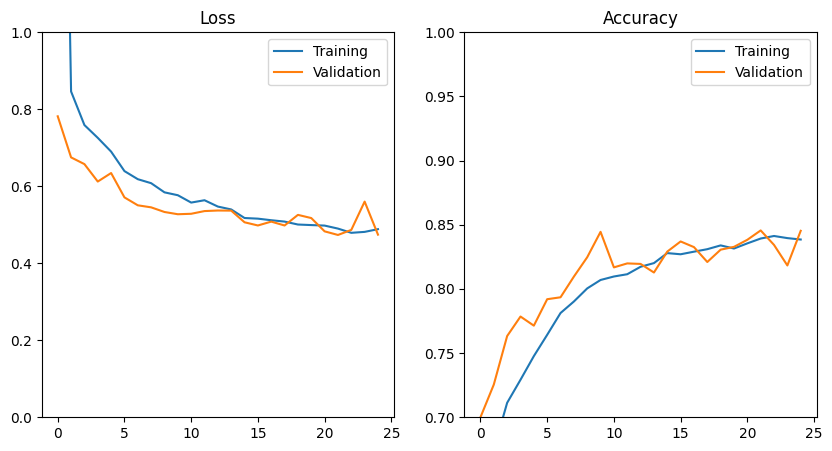

2022-12-03 00:26:56.085056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-03 00:27:03.162739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Complete for batch_size :  64


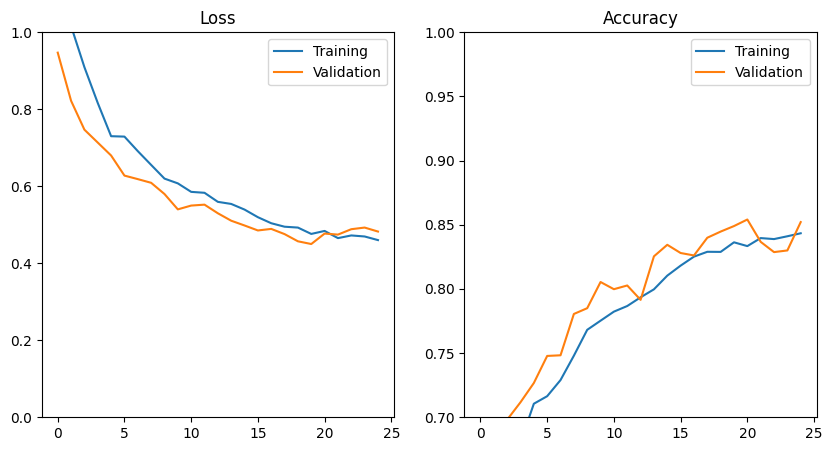

2022-12-03 00:30:01.412426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-03 00:30:05.201796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Complete for batch_size :  100


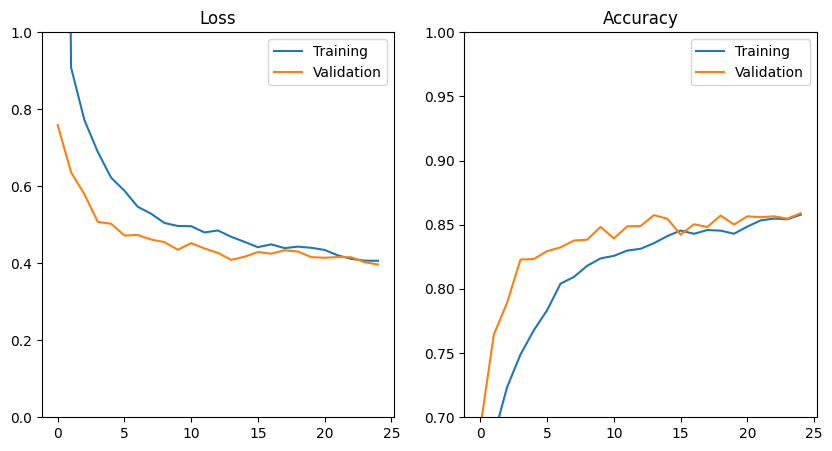

2022-12-03 00:31:43.926428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-03 00:31:46.523990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Complete for batch_size :  150


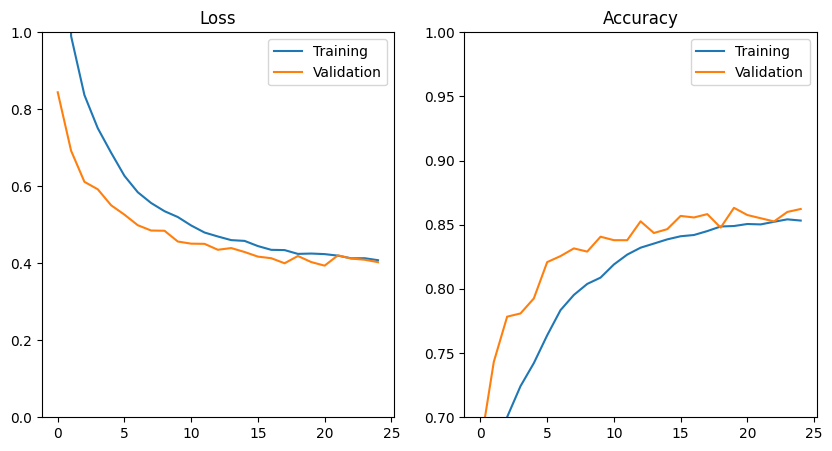

2022-12-03 00:32:53.728623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-03 00:32:55.788469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Complete for batch_size :  200


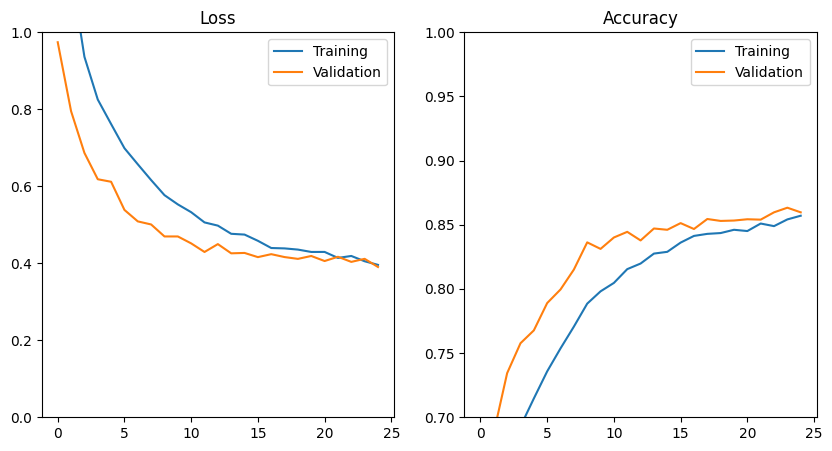

2022-12-03 00:33:47.917023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-03 00:33:49.610184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Complete for batch_size :  300


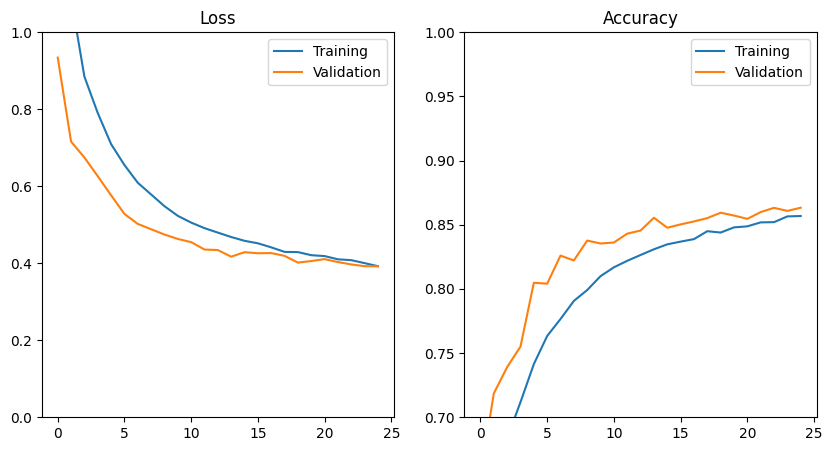

2022-12-03 00:34:26.876112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-03 00:34:27.883871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Complete for batch_size :  500


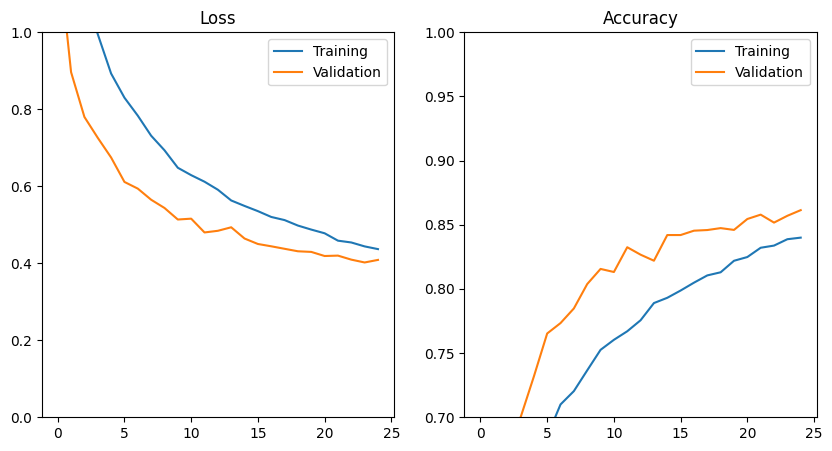

2022-12-03 00:34:50.665259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-03 00:34:51.312201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Complete for batch_size :  1000


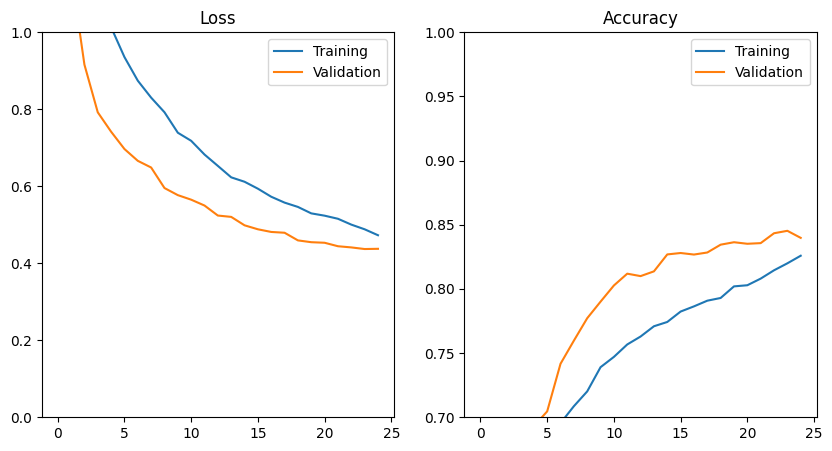

,acc,val acc,loss,val loss,Batch_size
0,0.838517,0.8453,0.488616,0.474362,32
1,0.843383,0.8521,0.460207,0.482401,64
2,0.857817,0.8590,0.406392,0.396867,100
3,0.853283,0.8623,0.408006,0.402902,150
4,0.857050,0.8597,0.395864,0.390377,200
5,0.856817,0.8633,0.392382,0.392160,300
6,0.839983,0.8614,0.436793,0.408778,500
7,0.825883,0.8398,0.472849,0.437574,1000


In [20]:
    
def plot(hist):    
    fig = plt.subplots(1,2,figsize = (10,5))
    plt.subplot(1,2,1)
    plt.plot(hist["loss"])
    plt.plot(hist['val_loss'])
    plt.legend(['Training','Validation'])
    plt.ylim(0,1)
    plt.title('Loss')

    plt.subplot(1,2,2)
    plt.plot(hist["accuracy"])
    plt.plot(hist['val_accuracy'])
    plt.legend(['Training','Validation'])
    plt.ylim(0.7,1)
    plt.title('Accuracy')
    plt.show()


sheet = pd.DataFrame(columns = ["acc", "val acc", "loss", "val loss"])
for batch in [32,64,100,150,200,300,500,1000]:
    model = Sequential()
    model.add(Input(shape=(784)))
    model.add(Dense(300,activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(120,activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10,activation = 'softmax'))

    model.compile(optimizer=Adam(),metrics='accuracy',loss = "categorical_crossentropy")
    
    model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=25,batch_size=batch,verbose=0)

    history_for_sheet = model.history.history
    collection = pd.DataFrame([[history_for_sheet["accuracy"][-1],
                                history_for_sheet['val_accuracy'][-1],
                                history_for_sheet['loss'][-1],
                                history_for_sheet["val_loss"][-1]]],
                                columns = ["acc", "val acc", "loss", "val loss"])
    sheet = pd.concat([sheet,collection])
    print('Complete for batch_size : ' ,batch)
    plot(history_for_sheet)


    
sheet['Batch_size'] =  [32,64,100,150,200,300,500,1000]
sheet.reset_index(inplace=True,drop=True)
sheet

In [21]:
sheet.to_csv('collection.csv')